<a href="https://colab.research.google.com/github/rs2pydev/misc_py_topics/blob/main/Sklearn_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>BUILDING MACHINE LEARNING PIPELINES WITH SCIKIT-LEARN</b></h1>

<p>
<font size="2">
<b>
This tutorial is based on the following YouTube video: 
<a href="https://www.youtube.com/watch?v=jzKSAeJpC6s">Understanding Pipeline in Machine Learning with Scikit-learn (<code>sklearn pipeline</code>)</a>
</b>
</font>
</p>

<h2><b>1. MAIN CONCEPTS</b></h2>

<p>
<ul type='I'>
<li>
A machine learning pipeline is a collection of sequential data preprocessing steps (called <b>transformers</b> in <code>sklearn</code>) that are chained together with a machine learning model (called <b>estimator</b> in <code>sklearn</code>). 
</li><br>
<li>
<b>Transformers</b> are generally meant for filtering and/or modifying the data. For instance, we will employ a <b>transformer</b> for the following purposes:
<ul>
<li>
Data cleaning, including treatment of missing values
</li>
<li>
Feature selection
</li>
<li>
Feature engineering
</li>
<li>
Target variable treatment
</li>
</ul>
</li><br>
<li>
In <code>sklearn</code>, a <b>transformer</b> is a class that can implement the methods, <code>.fit()</code>, <code>.transform()</code>, and <code>.fit_transform()</code>.
</li><br>
<li>
<b>Example:</b> We can employ  of a <b>transformer</b> to generate a new data matrix consisting of all polynomial combinations.
</li><br>
<li>
<b>Estimators</b> on the other hand, are employed for learning from data. In simple terms, an <b>estimator</b> is basically the machine learning model that is being built for training.
</li><br>
<li>
In <code>sklearn</code>, <b>estimators</b> are classes that implement the <code>.fit()</code> and <code>.predict()</code> methods.
</li><br>
<li>
<b>Example:</b> A linear regrsssion or a logistic regression model.
</li>
</ol>
</p>

<h4>We can also define a <b>pipeline</b> as the sequential application of a list of <b>transformers</b>, together with an <b>estimator</b>, on a given data set.</h4> 

<h2><b>2. BUILD A ML PIPELINE WITH <code>PolynomialFeatures</code> CLASS from <code>sklearn.preprocessing</code> MODULE</b></h2>

<h3><b>2.1 NECESSARY IMPORTS</b></h3>

In [1]:
import numpy as np
import matplotlib as mpl
import sklearn as skl

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

print(f'numpy version: {np.__version__:s}')
print(f'matplotlib version: {mpl.__version__:s}')
print(f'sklearn version: {skl.__version__:s}')

numpy version: 1.21.6
matplotlib version: 3.2.2
sklearn version: 1.0.2


<h3><b>2.2 CREATE DATASET</b></h3>

In [2]:
X_train = 10 * np.random.normal(0, 1, 70)
# Function: y = x^2 + Gaussian noise term
y_train = 10 * (-X_train ** 2) + np.random.normal(-100, 100, 70)
X_test = np.linspace(-30, 30, 100)

<h3><b>2.3 VISUALIZE DATASET</b></h3>

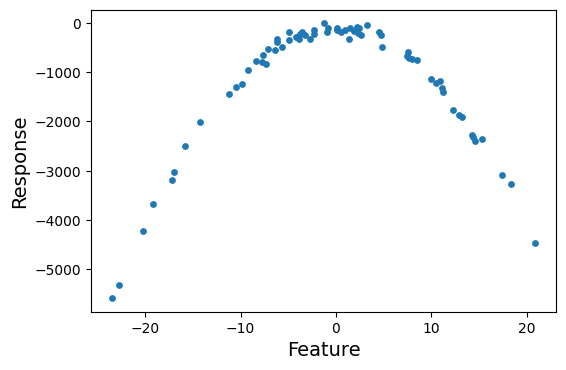

In [3]:
plt.figure(figsize=(6,4), dpi=100)
plt.scatter(X_train, y_train, s=15)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Response', fontsize=14)
plt.show()

<h3><b>2.3 CREATE LINEAR REGRESSION MODEL</b></h3>

In [4]:
lin_reg_model = LinearRegression()

<h3><b>2.4 TRAIN MODEL</b></h3>

In [5]:
lin_reg_model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression()

<h3><b>2.5 MAKE PREDICTIONS</b></h3>

In [6]:
y_preds = lin_reg_model.predict(X_test.reshape(-1, 1))

<h3><b>2.6 VISUAL COMPARISION OF PREDICTIONS WITH TRUE VALUES</b></h3>

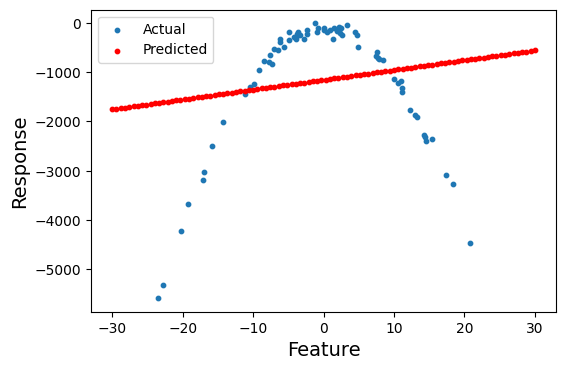

In [7]:
plt.figure(figsize=(6,4), dpi=100)
plt.scatter(X_train, y_train, s=10, label='Actual')
plt.scatter(X_test, y_preds, s=10, color='r', label='Predicted')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Response', fontsize=14)
plt.legend()
plt.show()

<h4><b>From the above comparison we find that the linear model cannot make correct predictions on the given , non-linear data! set</b></h4>

<h3><b>2.7 CREATE ML PIPELINE FOR DATA PREPROCESSING AND MODEL BUILDING</b></h3>

In [8]:
poly_feats = PolynomialFeatures(degree=2)

In [9]:
ml_pipe1 = Pipeline(steps=[\
                          ('poly_feats', poly_feats), \
                          ('lin_reg_model', lin_reg_model)
                          ])

print(f"Desc. of first pipeline: {ml_pipe1}")

Desc. of first pipeline: Pipeline(steps=[('poly_feats', PolynomialFeatures()),
                ('lin_reg_model', LinearRegression())])


In [10]:
ml_pipe2 = make_pipeline(poly_feats, lin_reg_model)

print(f"Desc. of second pipeline: {ml_pipe2}")

Desc. of second pipeline: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])


<h3><b>2.8 TRAIN AND MAKE PREDICTIONS WITH PIPELINES</b></h3>

In [14]:
ml_pipe1.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
ml_pipe2.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [15]:
y_preds1 = ml_pipe1.predict(X_test.reshape(-1, 1))
y_preds2 = ml_pipe1.predict(X_test.reshape(-1, 1))

<h3><b>2.9 VISUAL COMPARISION OF PREDICTIONS WITH TRUE VALUES</b></h3>

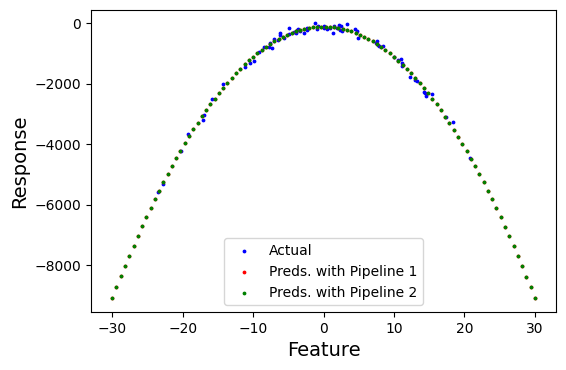

In [18]:
plt.figure(figsize=(6,4), dpi=100)
plt.scatter(X_train, y_train, s=3, color='b', label='Actual')
plt.scatter(X_test, y_preds1, s=3, color='r', label='Preds. with Pipeline 1')
plt.scatter(X_test, y_preds1, s=3, color='g', label='Preds. with Pipeline 2')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Response', fontsize=14)
plt.legend()
plt.show()